## Final Project

**Goal**:  
To classify POI out of enron email dataset.  To achieve accuracy such that, Precision and Recall are greater than 0.3 at least.  

**Premise**:  
There are 2 important starter files, given by Udacity. 
1. poi_id.py  - This is the file we would be working on creating the classifier. 
2. tester.py  - This is simply file used to test our code  

**Workflow Overview**:  
This is just again a starter skeleton to structure our thinking process. We will add/modify/iterate as and when needed. Thus this is also not all, and complete as well.

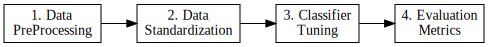

In [1]:
from graphviz import Digraph
g = Digraph('Work Flow',  node_attr={'shape': 'record'})
g.attr(rankdir='LR')
g.node('step_1', r'1. Data\nPreProcessing')
g.node('step_2', r'2. Data\nStandardization')
g.node('step_3', r'3. Classifier\nTuning')
g.node('step_4', r'4. Evaluation\nMetrics')
g.edges([('step_1','step_2'),('step_2','step_3'),('step_3','step_4')])
g

## Setup

Firstly let us make sure, given ```poi_id.py``` _(loaded here)_ and ```tester.py``` _(in our current directory)_ runs in current form and also to know what is the accuracy we are starting with. 

In [2]:
#!/usr/bin/python
# poi_id.py
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

C:\Users\parthi2929\Anaconda3\envs\py2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# tester.py
from tester import main
main()

GaussianNB(priors=None)

Accuracy: 0.25560	Precision: 0.18481	Recall: 0.79800	F1: 0.30011	F2: 0.47968
Total predictions: 10000
True positives: 1596	False positives: 7040	False negatives:  404	True negatives:  960



GaussianNB(priors=None)

## Modularize

Recall is pretty impressive, but accuracy and precisions are pathetically low. Apparantly, Salary is not the only feature useful to identify POIs effectively. 

We are going to repeat the entire process of ```poi_id.py``` for evaluation almost every time we come up with new findings. So we will modularize such that, we could just call the relevant functions instead to make it more readable.Below are the modularized functions to start with.  

Note we will not finish one stage (out of 4 shown above) and then go next. We will do iterative developement going back and forth. 

In [4]:
def init():
    """
    Load the raw data_dict from Udacity's pickle data and return it
    """
    import pickle
    sys.path.append("../tools/")
    ### Load the dictionary containing the dataset
    with open("final_project_dataset.pkl", "r") as data_file:
        data_dict = pickle.load(data_file)
        
    return data_dict

def split_data(my_dataset, features_list):
    # convert
    data = featureFormat(my_dataset, features_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    return labels, features 

def classify():
    # our classifier
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    return clf

from IPython.utils.coloransi import TermColors as color # just for color gimmicks on output
from tester import dump_classifier_and_data, main

def evaluate(clf, my_dataset, features_list):
    dump_classifier_and_data(clf, my_dataset, features_list)
    print '{1}Udacity\'s Evaluation:{0}'.format(color.Normal, color.BlinkBlue)
    return main()  # from tester.py

Now we could modify ```poi_id.py``` as below

In [5]:
data_dict = init()


# PRE PROCESSING


# STANDARDIZATION


# CLASSIFIER
features_list = ['poi','salary']
my_dataset = data_dict
labels, features = split_data(my_dataset, features_list)
clf = classify()

# EVALUATION
evaluate(clf, my_dataset, features_list)

Udacity's Evaluation:
GaussianNB(priors=None)

Accuracy: 0.25560	Precision: 0.18481	Recall: 0.79800	F1: 0.30011	F2: 0.47968
Total predictions: 10000
True positives: 1596	False positives: 7040	False negatives:  404	True negatives:  960



GaussianNB(priors=None)

## Classifier

We already have Guassian in our starter code, but how do other contenders fare? Let us try 3 more. 

In [6]:
print '{1}GaussianNB:{0}'.format(color.Normal, color.BlinkBlue)
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
dump_classifier_and_data(clf, my_dataset, features_list)
main()

print '{1}SVC Untuned:{0}'.format(color.Normal, color.BlinkBlue)
from sklearn.svm import SVC
clf = SVC()
dump_classifier_and_data(clf, my_dataset, features_list)
main()

print '{1}KMeans Untuned:{0}'.format(color.Normal, color.BlinkBlue)
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
dump_classifier_and_data(clf, my_dataset, features_list)
main()

print '{1}Decision Tree Untuned:{0}'.format(color.Normal, color.BlinkBlue)
random_state = 0
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=random_state)
dump_classifier_and_data(clf, my_dataset, features_list)  
_ = main()     # we made tester.py to return trained clf so to avoid re printing classifier in ipython we assign to dummy

GaussianNB:
GaussianNB(priors=None)

Accuracy: 0.25560	Precision: 0.18481	Recall: 0.79800	F1: 0.30011	F2: 0.47968
Total predictions: 10000
True positives: 1596	False positives: 7040	False negatives:  404	True negatives:  960

SVC Untuned:
Total predictions: 10000
True positives:    0	False positives:   77	False negatives: 2000	True negatives: 7923
Got a divide by zero when trying out: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Precision or recall may be undefined due to a lack of true positive predicitons.

KMeans Untuned:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Accuracy: 0.77580	Precision: 0.20488	Recall: 0.04200	F1: 0.06971	F2: 0.04994
Total predictions: 10000
Tr

```SVC``` outright failed, ```KMeans``` and ```Decision Tree``` are already giving much better accuracy. Before we pick one of ```KMeans``` or ```Decision Tree```, let us check one more trap - ```Zero Prediction Accuracy. ```

**What if our classifer always predicts non-POI?** Let us find out with a dummy classifier. Note we are also starting to use pandas.

In [7]:
import pandas as pd
df = pd.DataFrame.from_dict(my_dataset, orient='index')

print 'Total no of records: {}'.format(df.shape[0])
print 'Total no of POIs: {}'.format(df.loc[df['poi'] == True].shape[0])
print 'Total no of POIs: {}'.format(df.loc[df['poi'] == False].shape[0])

from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='constant',random_state=0, constant=False)
dump_classifier_and_data(clf, my_dataset, features_list)
clf = main()

Total no of records: 146
Total no of POIs: 18
Total no of POIs: 128
Total predictions: 10000
True positives:    0	False positives:    0	False negatives: 2000	True negatives: 8000
Got a divide by zero when trying out: DummyClassifier(constant=False, random_state=0, strategy='constant')
Precision or recall may be undefined due to a lack of true positive predicitons.



Note out of 146 records, we have only 18 POIs, so intuitively, even if we always guess 'non POI' we should be right most of the times. 

Remember:  

<div style="background-color:'#E3F2FD;  padding: 10px 10px 10px 10px;"><pre style="background-color:'#E3F2FD;">
True positives (TP):    Reality POI, Prediction POI.  
False positives (FP):   Reality non POI, Prediction POI.  
False negatives (FN):   Reality POI, Prediction non POI.  
True negatives (TN):    Reality non POI, Prediction non POI.</pre>  </div>

Accuracy = No of predictions in reality and predicted are equal / Total no of predictions

Thus

$$ \displaystyle \text{Accuracy = }\frac{{\text{TP}\text{+TN}}}{{\text{TP+FP+FN+TN}}}=\frac{{0+8000}}{{0+0+2000+8000}}=\frac{{8000}}{{10000}}=80\text{  }\%$$  

Ponder this, even if our model is simply not _predicting_ anything per se, we get 80% accuracy.  This is why, Recall and Precision are important. 

$$ \displaystyle \begin{array}{l}\text{Precision = }\dfrac{{\text{TP}}}{{\text{TP+FP}}}=\dfrac{0}{0}\\\text{Recall = }\dfrac{{\text{TP}}}{{\text{TP+FN}}}=\dfrac{0}{{2000}}=0\end{array}$$

Precision is incalculable and Recall is just 0. We are always wrongly labelling any POI that shows up in dataset as non-POI (FP) which is obviously inadmissable, and 0 Recall score indicates that.  

It could be for similar reason, we cannot also currently proceed to using SVC at the moment (try checking out) 

Comparing Recall and Precision between, ```Decision Tree``` fares better than ```KMeans``` so we shall go with that, though accuracy is as of now lower. 

So far, 
1. We have set up the code 
2. Chosen Decision Tree as our main classifier to proceed with
3. Understood, how better should our classifier fare than Zero prediction case (cross at least 80% accuracy)